# Visión por Computadora

### Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from skimage.color import rgb2gray, gray2rgb
from skimage import data
from PIL import Image

from time import time 

import cv2

# Read Image

In [2]:
imagePath = 'volei.jpeg'

In [3]:
I = plt.imread(imagePath)
I.shape

(720, 1280, 3)

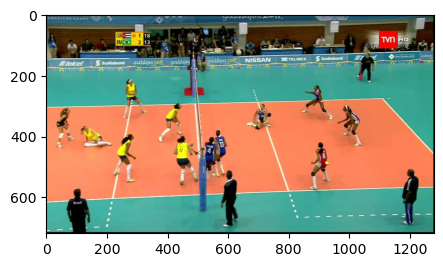

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(I)
plt.show()

# Image (OpenCV)

In [5]:
img = cv2.imread(imagePath)
img.shape

(720, 1280, 3)

In [6]:
img = cv2.resize(img, (int(img.shape[1]*1.5), int(img.shape[0]*1.5)))
img.shape

(1080, 1920, 3)

In [7]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(1080, 1920)

# Body Cascade Classifier

In [8]:
upper_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_upperbody.xml")
lower_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_lowerbody.xml")
body_classifier  = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_fullbody.xml")

In [9]:
upper = upper_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=2, minSize=(20, 10))
lower = lower_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=2, minSize=(20, 10))
body  = body_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=2, minSize=(10, 10))

In [10]:
upper.shape

(6, 4)

In [11]:
lower.shape

(4, 4)

In [12]:
body.shape

(5, 4)

In [13]:
for (x, y, w, h) in upper:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 128, 255), 3)

In [14]:
for (x, y, w, h) in lower:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 128), 3)

In [15]:
for (x, y, w, h) in body:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 128), 3)

In [16]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1919.5, 1079.5, -0.5)

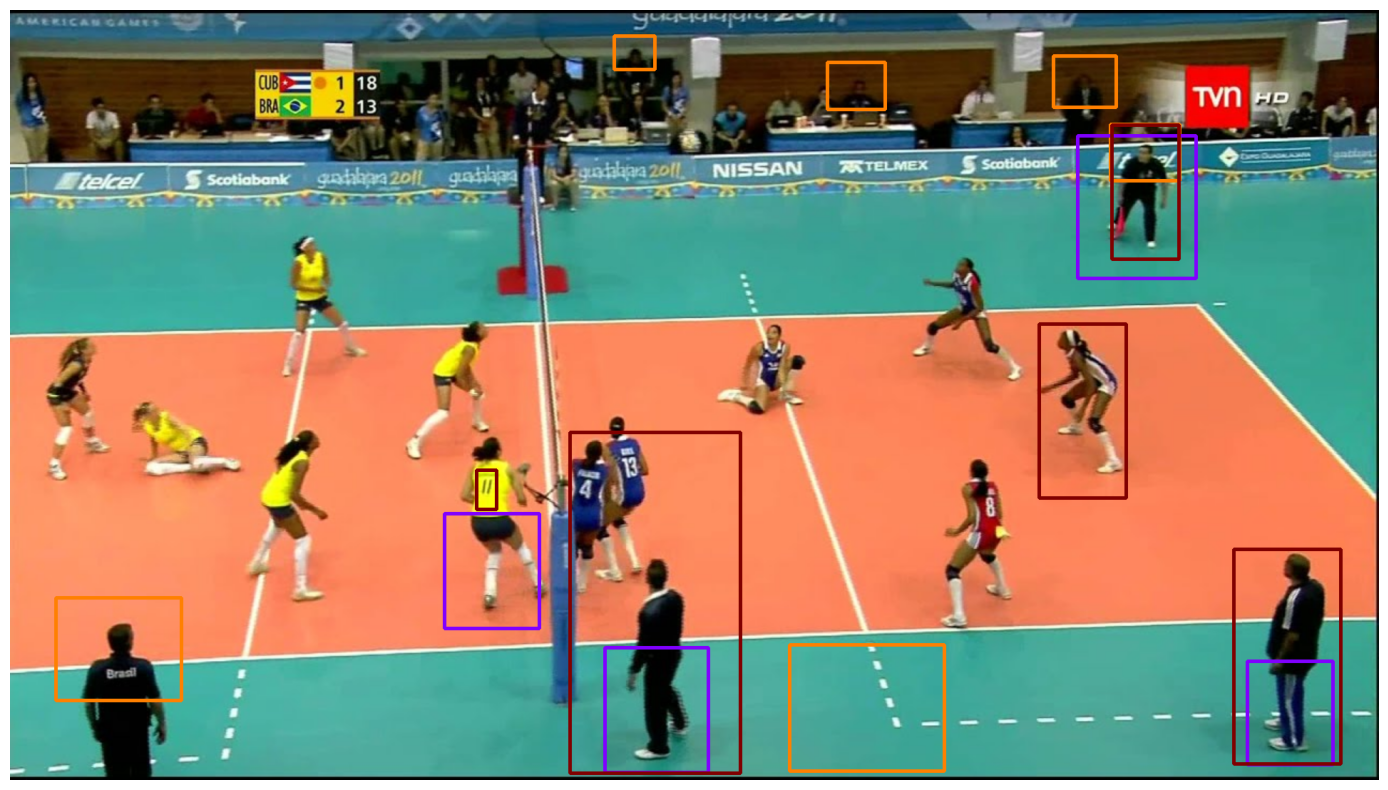

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')